In [2]:
!curl https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data > parkinsons.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40697  100 40697    0     0   156k      0 --:--:-- --:--:-- --:--:--  157k


In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy

In [2]:
df = pd.read_csv("parkinsons.data")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [5]:
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [6]:
X = df.drop(["status","name"] ,axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


In [7]:
train_vc  = y_train.value_counts()
print(f"Отношение  классов на тренировочной датасете {train_vc[0]/train_vc[1]}")

Отношение  классов на тренировочной датасете 0.32653061224489793


In [8]:
test_vc = y_test.value_counts()
print(f"Отношение  классов на тестовом датасете {test_vc[0]/test_vc[1]}")

Отношение  классов на тестовом датасете 0.32653061224489793


In [9]:
xgbc = XGBClassifier()

In [10]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
xgbc.score(X_test, y_test)

0.9076923076923077

In [12]:
from xgboost import train, DMatrix
trainDmatrix = DMatrix(X_train, label=y_train) #, weight=traintest_sample_weight)
validDmatrix = DMatrix(X_test, label=y_test) #, weight=valid_sample_weight)
booster = train({'eval_metric': 'auc'}, trainDmatrix, num_boost_round=100, 
                evals=[(trainDmatrix,'train'), (validDmatrix, 'valid')], early_stopping_rounds=50, 
                verbose_eval=10)

[0]	train-auc:1.00000	valid-auc:0.87500
[10]	train-auc:1.00000	valid-auc:0.90625
[20]	train-auc:1.00000	valid-auc:0.91837
[30]	train-auc:1.00000	valid-auc:0.92219
[40]	train-auc:1.00000	valid-auc:0.92219
[50]	train-auc:1.00000	valid-auc:0.92219
[60]	train-auc:1.00000	valid-auc:0.92219
[70]	train-auc:1.00000	valid-auc:0.92219
[73]	train-auc:1.00000	valid-auc:0.92219


In [13]:
validDmatrix = DMatrix(X_test)
predicted = booster.predict(validDmatrix)

In [14]:
demo_test_df = X_test.copy()

demo_test_df['pred'] = predicted
demo_test_df['pred'] = demo_test_df['pred'].apply(lambda x: 1 if x >= 0.5 else 0) 
demo_test_df['actual'] = y_test

Оценщик не правильно предсказал 9 примеров на тестовом наборе данных

In [15]:
demo_test_df[demo_test_df['pred'] != demo_test_df['actual']]['actual'].value_counts()

actual
1    7
0    2
Name: count, dtype: int64

In [16]:
wrong_pred_df = demo_test_df[demo_test_df['pred'] != demo_test_df['actual']]
wrong_pred_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,pred,actual
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,0,1
107,151.884,157.765,133.751,0.00258,0.00002,0.00115,0.00122,0.00346,0.01450,0.137,...,0.00659,26.833,0.393563,0.700246,-6.600023,0.249172,2.499148,0.105306,0,1
183,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,...,0.00955,23.079,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724,1,0
177,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,0.132,...,0.00570,24.151,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703,0,1
105,149.689,160.368,133.608,0.00257,0.00002,0.00116,0.00134,0.00349,0.01346,0.126,...,0.00578,27.421,0.365488,0.719974,-6.997403,0.210279,1.994387,0.112878,0,1
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.00703,24.775,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777,1,0
113,210.141,232.706,185.258,0.00534,0.00003,0.00321,0.00280,0.00964,0.01680,0.149,...,0.00620,23.671,0.441097,0.722254,-5.963040,0.250283,2.489191,0.177807,0,1
28,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,0.161,...,0.00677,25.970,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514,0,1
118,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,0.129,...,0.00856,25.020,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972,0,1


In [17]:
import shap

/Users/vyacheslav/Documents/projects/the-founder/vkdanu/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [18]:

explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test)

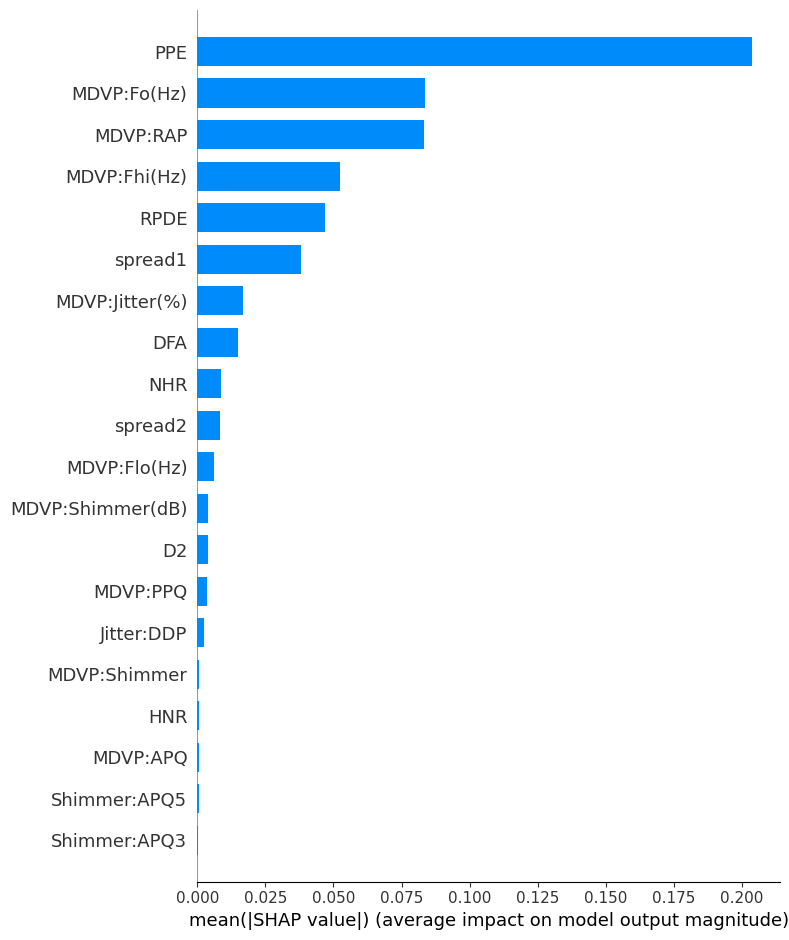

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

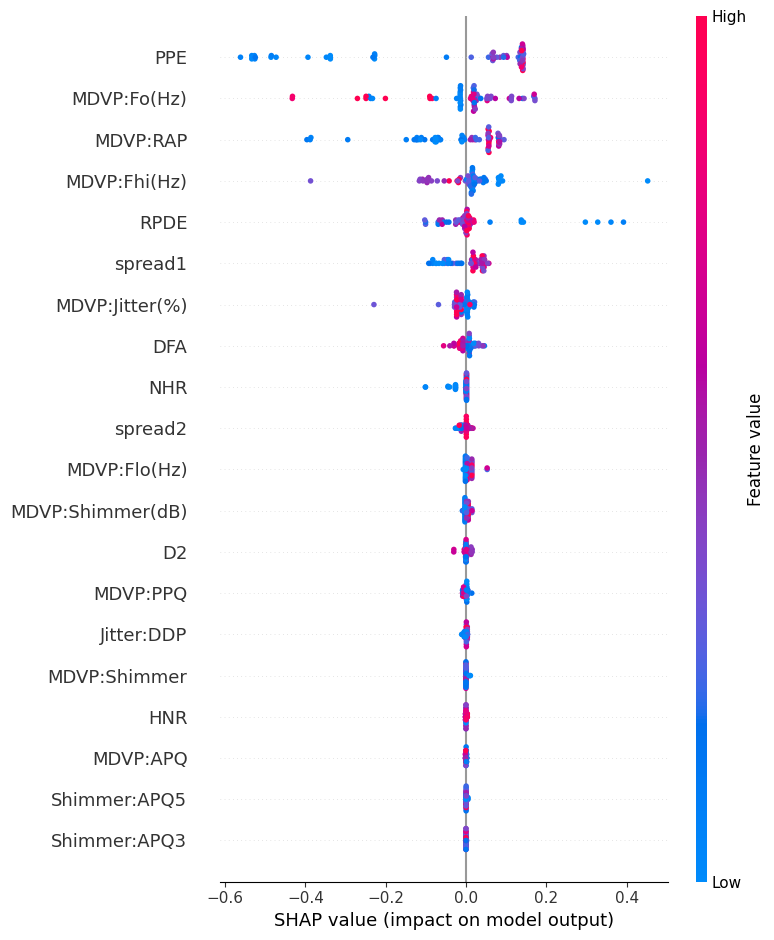

In [20]:
shap.summary_plot(shap_values, X_test)

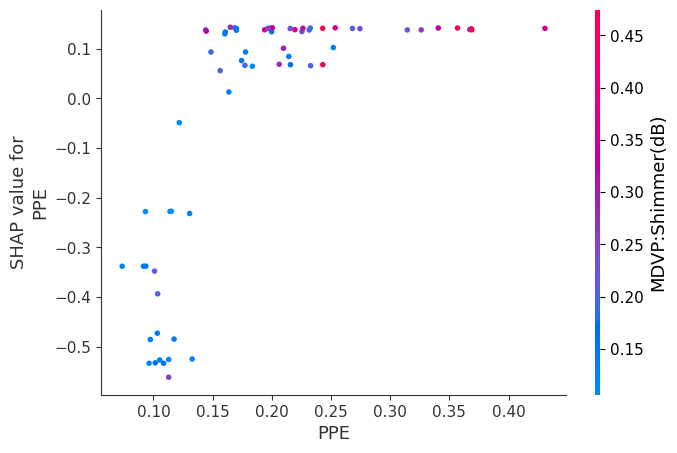

In [21]:
# same shap.plots.scatter(shap_values[:, "PPE"], color=shap_values)
shap.dependence_plot("PPE", shap_values, X_test)


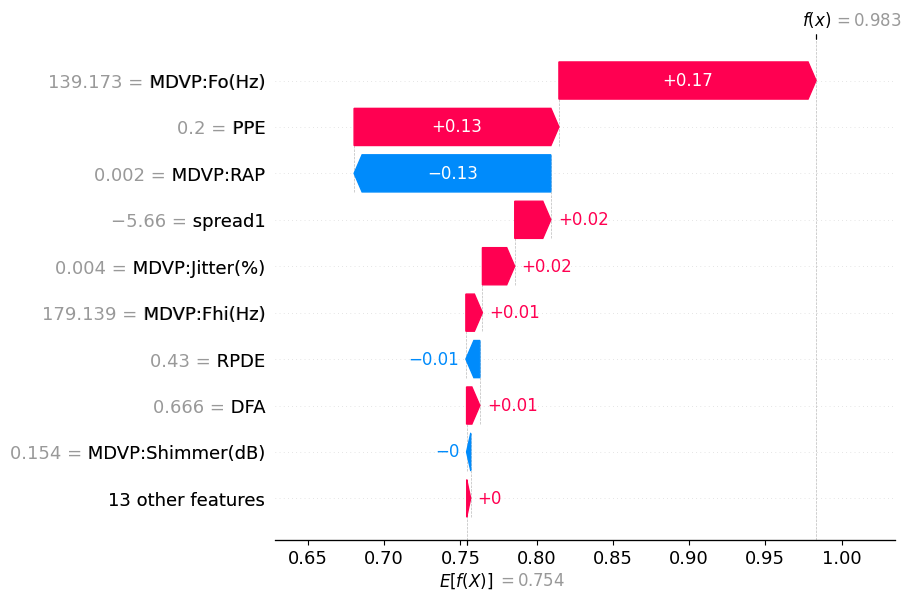

In [22]:
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

In [23]:

shap.plots.force(shap_values[0])

In [24]:
shap.plots.force(shap_values[:500])


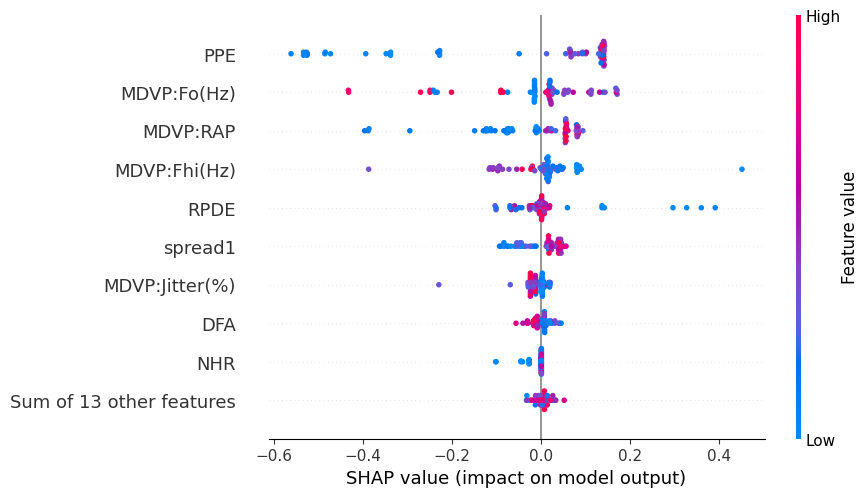

In [25]:
shap.plots.beeswarm(shap_values)




In [26]:
from sklearn.manifold import TSNE

In [58]:
#data = df[~df.index.isin(wrong_pred_df.index)].copy().reset_index(drop=True)
data = df.copy()
data.loc[data.index.isin(wrong_pred_df.index), 'status'] = data.loc[data.index.isin(wrong_pred_df.index), 'status']  + 2

In [59]:
data.drop(['name'], axis=1, inplace=True)
y_data = data[["status"]]
data.drop(['status'], axis=1, inplace=True)

In [60]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [61]:
%time 
embedding_train = tsne.fit_transform(data)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 195 samples in 0.001s...
[t-SNE] Computed neighbors for 195 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 195 / 195
[t-SNE] Mean sigma: 16.717366
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.679577
[t-SNE] KL divergence after 1000 iterations: 0.141709


In [66]:
fig = px.scatter(
    embedding_train, x=0, y=1,
    color=y_data['status'], 
    color_discrete_sequence=["red", "green", "blue", "goldenrod"]
)
fig.show()

# 0 = 0
# 1 = 1
# 2 = 0 - должен быть 1
# 3 = 1 - должен быть 0